# Make sure TensorFlow 2.0 is used

In [0]:
%tensorflow_version 2.x

# Import neede libraries

In [0]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import math

**Check TF version**

In [0]:
print(tf.version.VERSION)

2.2.0-rc1


# Check system specs (is GPU available)

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9793141948768189812, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3682074888770806815
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12197122416648897545
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7304675328
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 929940988181217366
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

# Load dataset

In [0]:
emnist_train = tfds.load(name="emnist/letters", split=tfds.Split.TRAIN, batch_size=-1 ) 
emnist_test = tfds.load(name="emnist/letters", split=tfds.Split.TEST, batch_size=-1)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/emnist/letters/3.0.0.incompleteZM7CCI/emnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/emnist/letters/3.0.0.incompleteZM7CCI/emnist-test.tfrecord


Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.0.0. Subsequent calls will reuse this data.


**Separate data and labels**

In [0]:
x_train, y_train = emnist_train["image"], emnist_train["label"]
x_test, y_test = emnist_test["image"],emnist_test["label"]

**Check dimensions and data type**

In [0]:
print(x_train.dtype)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<dtype: 'uint8'>
(88800, 28, 28, 1)
(88800,)
(14800, 28, 28, 1)
(14800,)


**Check label values (id of classes)**

In [0]:
print(tf.math.reduce_max(y_train))
print(tf.math.reduce_min(y_train))

tf.Tensor(26, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


# Dataset manipulation for easier manipulation

**Labels to one-hot encoding**

In [0]:
number_of_classes=26 #number of letters
y_train_OH=tf.one_hot(y_train, depth=number_of_classes)
y_test_OH=tf.one_hot(y_test, depth=number_of_classes)
print(y_train.shape)
print(y_train_OH.shape)
print(y_test.shape)
print(y_test_OH.shape)

(88800,)
(88800, 26)
(14800,)
(14800, 26)


**Check if one-hot encoding is correct**

In [0]:
print(y_train[33])
print(y_train_OH[33])
uniq, _ = tf.unique(y_train)
print(uniq)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(26,), dtype=float32)
tf.Tensor(
[25  7 11 10  4 24 18 22  2 13 16 14 21 23 19  8 15  5 20  3  1 12  9 26
  6 17], shape=(26,), dtype=int64)


**One-hot encoding is incorrect due to labels starting from 1**

In [0]:
y_train-=1
uniq, _ = tf.unique(y_train)
print(uniq)

tf.Tensor(
[24  6 10  9  3 23 17 21  1 12 15 13 20 22 18  7 14  4 19  2  0 11  8 25
  5 16], shape=(26,), dtype=int64)


In [0]:
y_test-=1
uniq, _ = tf.unique(y_test)
print(uniq)

tf.Tensor([12  7  0  8  5 11 16  1 10  6 14  9 13  4 17 18 15  3  2], shape=(19,), dtype=int64)


In [0]:
y_train_OH=tf.one_hot(y_train, depth=number_of_classes)
y_test_OH=tf.one_hot(y_test, depth=number_of_classes)

**Check if one-hot encoding is correct now**

In [0]:
print(y_train[33])
print(y_train_OH[33])

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(26,), dtype=float32)


In [0]:
print(y_train[101])
print(y_train_OH[101])

tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(26,), dtype=float32)


In [0]:
print(y_train[1596])
print(y_train_OH[1596])

tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(26,), dtype=float32)


**Cast image data from int to float (single precision)**

In [0]:
x_train=tf.dtypes.cast(x_train, tf.float32)
x_test=tf.dtypes.cast(x_test, tf.float32)

**Normalize pixel values**

In [0]:
x_train/=255.0
x_test/=255.0

In [0]:
print(tf.math.reduce_max(x_train))
print(tf.math.reduce_min(x_train))

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


# Dictionary for class names

In [0]:
class_names = ['A', 'B', 'C', 'D', 'E',
               'F', 'G', 'H', 'I', 'J', 
               'K', 'L', 'M', 'N', 'O', 
               'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 
               'Z']

# Visualize dataset

**Check one random example**

K
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(26,), dtype=float32)


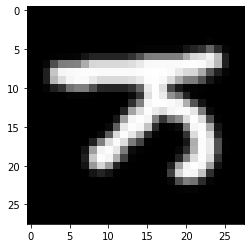

In [0]:
sample=5437
import matplotlib.pyplot as plt

img = x_train[sample]
plt.imshow(tf.squeeze(img), cmap='gray')
print(class_names[y_train[sample]])
print(y_train[sample])
print(y_train_OH[sample])

**Images need to be rotated!**

Text(0.5, 1.0, 'flipped + rotated')

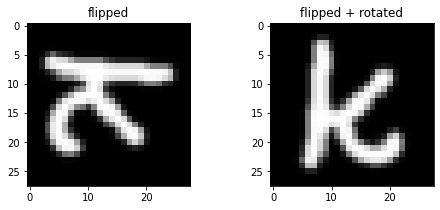

In [0]:
fig = plt.figure(figsize=(8, 3))
ax1, ax2 = fig.subplots(1, 2)

flipped=tf.image.flip_left_right(x_train[sample])
ax1.imshow(tf.squeeze(flipped), cmap='gray')
ax1.set_title('flipped')
rotated=tf.image.rot90(flipped, k=1)
ax2.imshow(tf.squeeze(rotated), cmap='gray')
ax2.set_title('flipped + rotated')

**Apply to whole dataset**

In [0]:
number_of_examples_for_train=x_train.shape[0]
number_of_examples_for_test=x_test.shape[0]

print(number_of_examples_for_train)
print(number_of_examples_for_test)

88800
14800


In [0]:
x_train_rotated=np.empty(shape=[number_of_examples_for_train, 28, 28, 1], dtype=np.float32)
for i in range(len(x_train)):
        flipped=tf.image.flip_left_right(x_train[i])
        rotated=tf.image.rot90(flipped, k=1)
        x_train_rotated[i]=rotated

In [0]:
print(x_train_rotated.shape)
x_train=tf.convert_to_tensor(x_train_rotated)

(88800, 28, 28, 1)


**Check if rotation is good for first 25 examples**

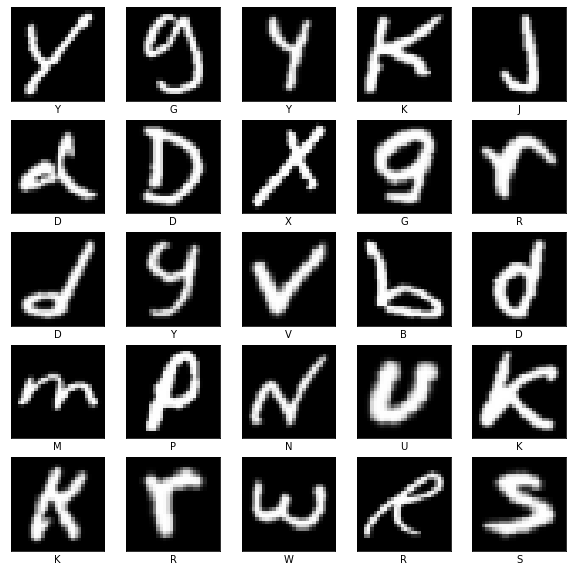

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(x_train[i]), cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Don't forget test set!**

In [0]:
x_test_rotated=np.empty(shape=[number_of_examples_for_test, 28, 28, 1], dtype=np.float32)
for i in range(len(x_test)):
        flipped=tf.image.flip_left_right(x_test[i])
        rotated=tf.image.rot90(flipped, k=1)
        x_test_rotated[i]=rotated

In [0]:
print(x_test_rotated.shape)
x_test=tf.convert_to_tensor(x_test_rotated)

(14800, 28, 28, 1)


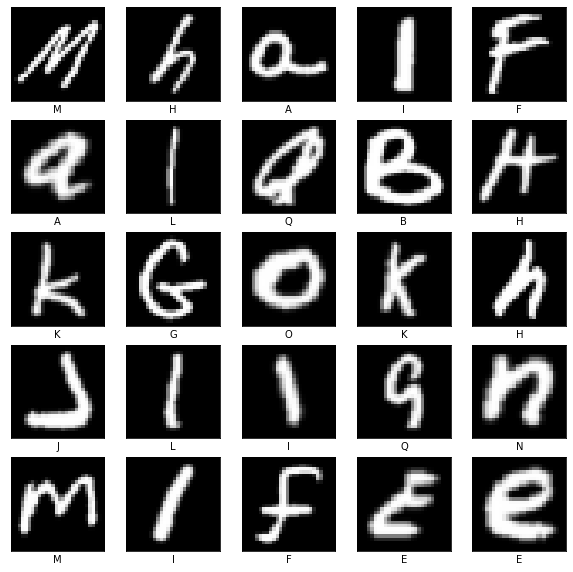

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(x_test[i]), cmap='gray')
    plt.xlabel(class_names[y_test[i]])
plt.show()

# Augment dataset

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 1024

In [0]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, shear_range=0.3,
                       height_shift_range=0.1, zoom_range=0.1)

In [0]:
batches = gen.flow(x_train, y_train_OH, batch_size=BATCH_SIZE)
test_batches = gen.flow(x_test, y_test_OH, batch_size=BATCH_SIZE)
steps_per_epoch = int(np.ceil(batches.n/BATCH_SIZE))
validation_steps = int(np.ceil(test_batches.n/BATCH_SIZE))

print(steps_per_epoch)
print(validation_steps)

87
15


**Check how we generate new images from one example**

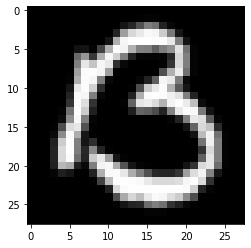

In [0]:
img=x_train[33]
plt.imshow(tf.squeeze(img), cmap='gray')

In [0]:
#hack for generator test, adding one more dimension
img=tf.expand_dims(img,0)

aug_iter = gen.flow(img)
augmented = next(aug_iter)[0].astype(np.float32)
print(augmented.shape)

(28, 28, 1)


**Now when generator return right shape let's visualize new examples**

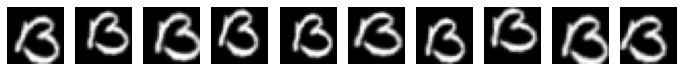

In [0]:
plt.figure(figsize=(12,6))
for i in range(10):
    sub=plt.subplot(2,10,i+1)
    sub.axis('Off')
    augmented = next(aug_iter)[0].astype(np.float32)
    plt.imshow(tf.squeeze(augmented), cmap='gray')

# Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28 ,1)),
    BatchNormalization(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(number_of_classes, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9

# Mount Google Drive


In [0]:
!pip install -q pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/'My Drive'/'Colab Notebooks'/diplomski

training_1


In [0]:
import tensorflow.keras.callbacks 

In [0]:
dir = "/content/drive/'My Drive'/'Colab Notebooks'/diplomski"
checkpoint_path = "/training_1/cp.ckpt"


# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

#early stop callback
es_callback=tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_accuracy',
                                     restore_best_weights=True)

In [0]:
!ls /content/drive/'My Drive'/'Colab Notebooks'/diplomski/training_1
!pwd

checkpoints  my_model.h5
/content


# Train model

In [0]:
print(type(x_train))
print(type(y_train_OH))
print(type(x_test))
print(type(y_test_OH))

history = model.fit_generator(generator=batches,steps_per_epoch=steps_per_epoch, epochs=100, 
                    validation_data=test_batches, validation_steps=validation_steps,
                    callbacks=[cp_callback, es_callback])

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 0.2678 - accuracy: 0.9108
Epoch 00001: saving model to /training_1/cp.ckpt
87/87 [==============================] - 24s 273ms/step - loss: 0.2678 - accuracy: 0.9108 - val_loss: 8.1382 - val_accuracy: 0.0657
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9221
Epoch 00002: saving model to /training_1/cp.ckpt
87/87 [==============================] - 24s 274ms/step - loss: 0.2295 - accuracy: 0.9221 - val_loss: 6.7688 - val_accuracy: 0.0724
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9279
Epoch 00003: saving model to /training_1/cp.ckpt
87/87 [==============================] - 24s 275ms/step - loss: 0.2136 - accuracy: 0.927

463/463 - 1s - loss: 0.1931 - accuracy: 0.9348
Trained model, accuracy: 93.48%


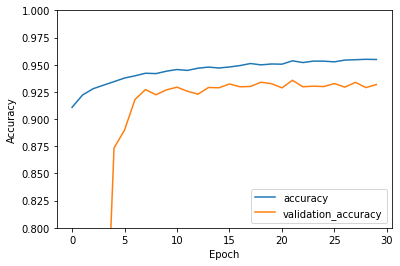

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_OH, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100*test_acc))

# Save model

In [0]:
model.save_weights("/content/drive/My Drive/Colab Notebooks/diplomski/training_1/checkpoints/my_checkpoint")
model.save("/content/drive/My Drive/Colab Notebooks/diplomski/training_1/my_model.h5") 

# Try to predict classes on test set

In [0]:
predictions_OH = model.predict(x_test, batch_size=1024)
print(predictions_OH.shape)

(14800, 26)


In [0]:
predictions=tf.math.argmax(predictions_OH, axis=1)
print(predictions.shape)

(14800,)


**Get correct predictions**

In [0]:
correct=tf.where(predictions==y_test)
print(correct.shape)

(13835, 1)


**Get incorrect predictions**

In [0]:
incorrect=tf.where(predictions!=y_test)
print(incorrect.shape)

(965, 1)


# Visualize model (todo)

In [0]:
import pydotplus as pydot

from keras.utils import plot_model
plot_model(models[0], to_file='model.png')

# visualize our model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(models[0]).create(prog='dot', format='svg'))


# Use TensorBoard

In [0]:
%load_ext tensorboard
%tensorboard --logdir logs